<a href="https://colab.research.google.com/github/kmkarakaya/btk_rag_bot_egitimi/blob/main/3_3_Gemini_API_Kullan%C4%B1m%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

The new **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](Get_started.ipynb#scrollTo=Mfk6YY3G5kqp) the Google GenAI SDK
* [Text](Get_started.ipynb#scrollTo=6TYNPrNvQ8ue) and [multimodal](#scrollTo=yww-vrxmRiIy) prompting
* Counting [tokens](Get_started.ipynb#scrollTo=_9B8pb7tv_Cx)
* Setting system instructions
* Configuring [safety filters](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* Initiating a [multi-turn chat](Get_started.ipynb#scrollTo=HTAnYx_bbxPk)
* [Controlling generated output](Get_started.ipynb#scrollTo=nyZMoM6tgnTA)
* Using [function calling](Get_started.ipynb#scrollTo=Rl-y9SZywD0s)
* Generating a [content stream](Get_started.ipynb#scrollTo=uQfLCxfQtPTg) and sending [asynchronous](Get_started.ipynb#scrollTo=plCtEIaHuv96) requests
* Using [file uploads](Get_started.ipynb#scrollTo=enBhuaIk3KYa)
* Using [context caching](Get_started.ipynb#scrollTo=oTgeR3_9wN5J)
* Generating [text embeddings](Get_started.ipynb#scrollTo=sXNCRn8Wx71d)

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai).

In [ ]:
%pip install -U -q 'google-genai>=1.0.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 6.6 MB/s eta 0:00:00


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook](./Get_started_thinking.ipynb) to learn how to switch the thinking off.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [ ]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite-preview-06-17", "gemini-2.5-flash", "gemini-2.5-pro"] {"allow-input":true, isTemplate: true}

## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

Markdown(response.text)

The largest planet in our solar system is **Jupiter**.

## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(response)

total_tokens=10 cached_content_token_count=None


## Send multimodal prompts

Use Gemini 2.0 model (`gemini-2.0-flash-exp`), a multimodal model that supports multimodal prompts. You can include text, [PDF documents](../quickstarts/PDF_Files.ipynb), images, [audio](../quickstarts/Audio.ipynb) and [video](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [ ]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In this second example, you'll open a previously saved image, create a thumbnail of it and then generate a short blog post based on the thumbnail, displaying both the thumbnail and the generated blog post.

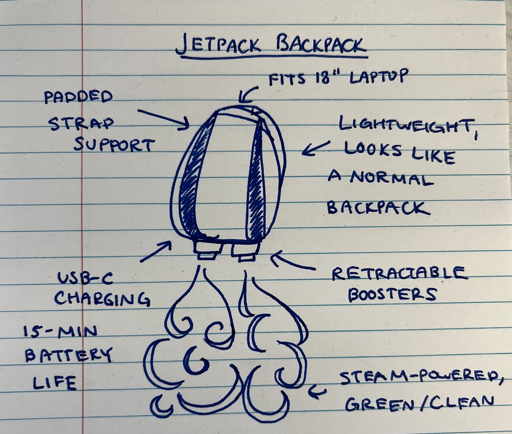

## Forget Traffic: Is the Jetpack Backpack Your Next Commute?

Ever dreamt of soaring above the morning rush hour, ditching gridlock for blue skies? Well, a recent concept sketch has us buzzing about a seemingly ordinary backpack with an extraordinary secret: a built-in personal jetpack!

Dubbed the "Jetpack Backpack," this ingenious concept aims to blend cutting-edge personal flight with everyday practicality. What immediately jumps out is its surprisingly discreet design. It **"LOOKS LIKE A NORMAL BACKPACK,"** making you the coolest secret agent on your daily commute. And don't worry about leaving your tech behind – it **"FITS AN 18" LAPTOP"** with ease, along with **"PADDED STRAP SUPPORT"** for comfort.

But here's where the magic truly begins: hidden at the bottom are **"RETRACTABLE BOOSTERS."** Imagine pulling up to your office building, the boosters discreetly tucking away as you walk inside. Even better for the environmentally conscious, this isn't some gas-guzzling beast; it's envisioned as **"STEAM-POWERED, GREEN/CLEAN"** – talk about eco-friendly elevation!

Charging up your new wings would be a breeze with **"USB-C CHARGING,"** keeping it aligned with modern tech. Now, for the reality check: the current concept boasts a **"15-MIN BATTERY LIFE."** While this might not get you across the country, it's absolutely perfect for those pesky last-mile commutes, hopping over a few blocks of traffic, or simply making the most epic entrance (or exit!) you can imagine.

While still a brilliant sketch on lined paper, the "Jetpack Backpack" reminds us that the future of personal transportation might be closer, and certainly much cooler, than we think. Who's ready to ditch the bus stop for the sky?

In [ ]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response. Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/text-generation?lang=node#configure).

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

Markdown(response.text)

Woof woof! You! Yes, YOU! You have a *squeak*! A very important *squeak* you want to send to your friend, the fluffy cat, who lives far, far away!

**You have a Squeak!** (That's your message, your picture of a squirrel, your video of a bouncy ball!)
*Squeak!*

**Sending Your Squeak!**
You want to throw your *squeak*! But it's too far to throw! So, your *squeak* goes to a special box near your human. It's like a **Squeaky Toy Launcher**!
*WHIZZ! Squeak!*

**Invisible Paths!**
This **Squeaky Toy Launcher** sends your *squeak* onto invisible, wiggly, super-duper long paths! Paths that go under the grass! Paths that go over the trees! Paths that go all the way to the fluffy cat's house!
*Squeak-squeak-squeak-squeak!* (Imagine tiny squeaks zooming!)

**Giant Squeaky Toy Piles!**
Sometimes, your *squeak* doesn't go straight to the fluffy cat. Sometimes it goes to a **GIANT, GIANT pile of squeaky toys**! These are like the biggest squeaky toy closets in the world! When you want to see a picture of a squirrel, you're asking one of these *big squeaky toy piles* for *their* squirrel-squeak!
*WOOF! Squeak! (That's the squirrel picture popping up!)*

**Getting Squeaks Back!**
And when the fluffy cat sends *you* a *squeak* (maybe a video of a laser pointer!), it comes back on those same invisible paths! *Squeak! Squeak! Squeak!* Right to your **Squeaky Toy Launcher** box, and then to you!
*Wag wag! Pant pant!*

**Lots of Little Squeaks!**
It's not one big *WHOOSH-SQUEAK!* It's lots of little *squeaky-bits* that all travel together and then magically become one big *SQUEAKY THING* when they get to you!
*Sniff sniff! Squeak! Good boy!*

So, the internet is just **ALL THE SQUEAKS!** Going everywhere! All the time! *WOOF! Squeak!* Now, where's that ball?

## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) page for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [ ]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

Here are two disrespectful things you might say to the universe after stubbing your toe in the dark:

1.  "Oh, real *clever*, universe! Was that supposed to be witty?"
2.  "Is that all you've got, you cosmic butterfingers?"

## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [ ]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

You're looking for a function that implements the rules for determining if a year is a leap year.

Here are the rules for a leap year in the Gregorian calendar:

1.  A year **must be divisible by 4** to be a leap year.
2.  However, if the year is **divisible by 100**, it is **NOT** a leap year...
3.  ...**UNLESS** the year is also **divisible by 400**. In that case, it *is* a leap year.

Let's implement this in a few popular programming languages.

---

## 1. Python

Python has a very concise way to express this logic. It also has a built-in function for it!

**Python Implementation:**

```python
import calendar

def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.

    Args:
        year: An integer representing the year.

    Returns:
        True if the year is a leap year, False otherwise.

    Examples:
        >>> is_leap_year(2000)
        True
        >>> is_leap_year(1900)
        False
        >>> is_leap_year(2004)
        True
        >>> is_leap_year(2007)
        False
    """
    # Rule:
    # 1. Divisible by 4, AND
    # 2. (NOT divisible by 100 OR divisible by 400)
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# --- Demonstrating Usage ---
if __name__ == "__main__":
    test_years = [1900, 1904, 2000, 2004, 2023, 2024, 2100, 2400]

    print("--- Custom Function (`is_leap_year`) ---")
    for year in test_years:
        print(f"Is {year} a leap year? {is_leap_year(year)}")

    print("\n--- Using Python's Built-in (`calendar.isleap`) ---")
    for year in test_years:
        print(f"Is {year} a leap year? {calendar.isleap(year)}")

```

**Explanation:**

*   `year % 4 == 0`: Checks if the year is divisible by 4.
*   `year % 100 != 0`: Checks if the year is *not* divisible by 100.
*   `year % 400 == 0`: Checks if the year is divisible by 400.

The combined `(year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)` handles all three rules efficiently.

---

## 2. JavaScript

**JavaScript Implementation:**

```javascript
/**
 * Checks if a given year is a leap year according to the Gregorian calendar rules.
 *
 * @param {number} year - An integer representing the year.
 * @returns {boolean} True if the year is a leap year, False otherwise.
 *
 * @example
 * isLeapYear(2000); // true
 * isLeapYear(1900); // false
 * isLeapYear(2004); // true
 * isLeapYear(2007); // false
 */
function isLeapYear(year) {
  // Rule:
  // 1. Divisible by 4, AND
  // 2. (NOT divisible by 100 OR divisible by 400)
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

// --- Demonstrating Usage ---
console.log("--- Custom Function (`isLeapYear`) ---");
const testYears = [1900, 1904, 2000, 2004, 2023, 2024, 2100, 2400];

testYears.forEach(year => {
  console.log(`Is ${year} a leap year? ${isLeapYear(year)}`);
});

// Alternative using Date object (less direct for just "is leap year", more for date math)
console.log("\n--- Using JavaScript's Date Object (Alternative) ---");
testYears.forEach(year => {
    // Check if February has 29 days in that year
    const isLeap = new Date(year, 1, 29).getMonth() === 1; // Month 1 is February (0-indexed)
    console.log(`Is ${year} a leap year? ${isLeap}`);
});
```

**Explanation:**

The logic is identical to Python, using the `===` (strict equality) and `!==` (strict inequality) operators.

---

## 3. C#

**C# Implementation:**

```csharp
using System;

public class LeapYearChecker
{
    /// <summary>
    /// Checks if a given year is a leap year according to the Gregorian calendar rules.
    /// </summary>
    /// <param name="year">An integer representing the year.</param>
    /// <returns>True if the year is a leap year, False otherwise.</returns>
    /// <example>
    /// IsLeapYear(2000); // true
    /// IsLeapYear(1900); // false
    /// IsLeapYear(2004); // true
    /// IsLeapYear(2007); // false
    /// </example>
    public static bool IsLeapYear(int year)
    {
        // Rule:
        // 1. Divisible by 4, AND
        // 2. (NOT divisible by 100 OR divisible by 400)
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Demonstrating Usage ---
    public static void Main(string[] args)
    {
        int[] testYears = { 1900, 1904, 2000, 2004, 2023, 2024, 2100, 2400 };

        Console.WriteLine("--- Custom Function (IsLeapYear) ---");
        foreach (int year in testYears)
        {
            Console.WriteLine($"Is {year} a leap year? {IsLeapYear(year)}");
        }

        // Alternative using built-in DateTime class
        Console.WriteLine("\n--- Using C#'s Built-in (DateTime.IsLeapYear) ---");
        foreach (int year in testYears)
        {
            Console.WriteLine($"Is {year} a leap year? {DateTime.IsLeapYear(year)}");
        }
    }
}
```

**Explanation:**

C# also uses the same modulo (`%`) operator and boolean logic. It also has a convenient built-in `DateTime.IsLeapYear()` method.

---

## 4. Java

**Java Implementation:**

```java
public class LeapYearChecker {

    /**
     * Checks if a given year is a leap year according to the Gregorian calendar rules.
     *
     * @param year An integer representing the year.
     * @return True if the year is a leap year, False otherwise.
     *
     * @example
     * isLeapYear(2000); // true
     * isLeapYear(1900); // false
     * isLeapYear(2004); // true
     * isLeapYear(2007); // false
     */
    public static boolean isLeapYear(int year) {
        // Rule:
        // 1. Divisible by 4, AND
        // 2. (NOT divisible by 100 OR divisible by 400)
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }

    // --- Demonstrating Usage ---
    public static void main(String[] args) {
        int[] testYears = { 1900, 1904, 2000, 2004, 2023, 2024, 2100, 2400 };

        System.out.println("--- Custom Function (isLeapYear) ---");
        for (int year : testYears) {
            System.out.println("Is " + year + " a leap year? " + isLeapYear(year));
        }

        // Alternative using built-in java.time.Year class
        System.out.println("\n--- Using Java's Built-in (java.time.Year.isLeap) ---");
        for (int year : testYears) {
            System.out.println("Is " + year + " a leap year? " + java.time.Year.of(year).isLeap());
        }
    }
}
```

**Explanation:**

Java uses the same logical structure as C# and Python. It also has a modern `java.time.Year` class with an `isLeap()` method.

---

**Summary of the Logic:**

The core logic remains the same across these languages:

```
(year % 4 == 0 AND year % 100 != 0) OR (year % 400 == 0)
```

This boolean expression directly translates the leap year rules into code. It's concise, efficient, and widely accepted as the standard way to check for leap years.

Here's another example using your new helpful coding assistant:

In [ ]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

You're right to ask for unit tests! Good tests ensure the function works as expected for all relevant cases.

The key to testing a leap year function is to cover all four rules:

1.  **Standard Leap Year:** Divisible by 4, but not by 100. (e.g., 2004, 2024) -> `True`
2.  **Standard Non-Leap Year:** Not divisible by 4. (e.g., 2007, 2023) -> `False`
3.  **Century Non-Leap Year:** Divisible by 100, but not by 400. (e.g., 1900, 2100) -> `False`
4.  **Century Leap Year:** Divisible by 400. (e.g., 2000, 1600) -> `True`

Here are unit tests for the previously generated functions in Python, JavaScript, C#, and Java.

---

## 1. Python (using `unittest`)

To run this, save the `is_leap_year` function (from the previous answer) in a file like `leap_year_checker.py`, and save the test code below in a separate file (e.g., `test_leap_year.py`) in the same directory.

**`leap_year_checker.py` (your function):**

```python
# leap_year_checker.py
def is_leap_year(year: int) -> bool:
    """
    Checks if a given year is a leap year according to the Gregorian calendar rules.
    """
    return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)
```

**`test_leap_year.py` (your unit tests):**

```python
import unittest
from leap_year_checker import is_leap_year # Import the function

class TestIsLeapYear(unittest.TestCase):

    def test_standard_leap_years(self):
        """Test years divisible by 4 but not by 100."""
        self.assertTrue(is_leap_year(2004), "2004 should be a leap year")
        self.assertTrue(is_leap_year(2024), "2024 should be a leap year")
        self.assertTrue(is_leap_year(1996), "1996 should be a leap year")

    def test_standard_non_leap_years(self):
        """Test years not divisible by 4."""
        self.assertFalse(is_leap_year(2007), "2007 should not be a leap year")
        self.assertFalse(is_leap_year(2023), "2023 should not be a leap year")
        self.assertFalse(is_leap_year(1999), "1999 should not be a leap year")
        self.assertFalse(is_leap_year(1), "1 should not be a leap year") # Edge case

    def test_century_non_leap_years(self):
        """Test years divisible by 100 but not by 400."""
        self.assertFalse(is_leap_year(1900), "1900 should not be a leap year")
        self.assertFalse(is_leap_year(2100), "2100 should not be a leap year")
        self.assertFalse(is_leap_year(2200), "2200 should not be a leap year")

    def test_century_leap_years(self):
        """Test years divisible by 400."""
        self.assertTrue(is_leap_year(2000), "2000 should be a leap year")
        self.assertTrue(is_leap_year(1600), "1600 should be a leap year")
        self.assertTrue(is_leap_year(2400), "2400 should be a leap year")

    def test_zero_year(self):
        """Test year 0 (mathematically divisible by 400)."""
        # Note: Year 0 is not part of Gregorian calendar, but for mathematical completeness
        self.assertTrue(is_leap_year(0), "Year 0 is mathematically a leap year by rules")

if __name__ == '__main__':
    unittest.main() # This will discover and run all tests in this file
```

**How to run:**
Navigate to the directory containing both files in your terminal and run:
`python -m unittest test_leap_year.py`

---

## 2. JavaScript (using `Jest`)

First, ensure you have Node.js installed.
1.  Initialize a new project: `npm init -y`
2.  Install Jest: `npm install --save-dev jest`
3.  Add a `test` script to your `package.json`:
    ```json
    "scripts": {
      "test": "jest"
    }
    ```

**`leapYearChecker.js` (your function):**

```javascript
// leapYearChecker.js
function isLeapYear(year) {
  return (year % 4 === 0 && year % 100 !== 0) || (year % 400 === 0);
}

module.exports = isLeapYear; // Export the function
```

**`leapYearChecker.test.js` (your unit tests):**

```javascript
// leapYearChecker.test.js
const isLeapYear = require('./leapYearChecker'); // Import the function

describe('isLeapYear', () => {

  test('should return true for standard leap years (divisible by 4, not 100)', () => {
    expect(isLeapYear(2004)).toBe(true);
    expect(isLeapYear(2024)).toBe(true);
    expect(isLeapYear(1996)).toBe(true);
  });

  test('should return false for standard non-leap years (not divisible by 4)', () => {
    expect(isLeapYear(2007)).toBe(false);
    expect(isLeapYear(2023)).toBe(false);
    expect(isLeapYear(1999)).toBe(false);
    expect(isLeapYear(1)).toBe(false); // Edge case
  });

  test('should return false for century years not divisible by 400', () => {
    expect(isLeapYear(1900)).toBe(false);
    expect(isLeapYear(2100)).toBe(false);
    expect(isLeapYear(2200)).toBe(false);
  });

  test('should return true for century years divisible by 400', () => {
    expect(isLeapYear(2000)).toBe(true);
    expect(isLeapYear(1600)).toBe(true);
    expect(isLeapYear(2400)).toBe(true);
  });

  test('should return true for year 0 (mathematically divisible by 400)', () => {
    expect(isLeapYear(0)).toBe(true);
  });
});
```

**How to run:**
Navigate to your project directory in the terminal and run:
`npm test`

---

## 3. C# (using `NUnit`)

You'll need to set up a .NET project and add the NUnit NuGet packages.
1.  Create a new C# Class Library project (e.g., `LeapYearProject`).
2.  Add a new NUnit Test Project (e.g., `LeapYearProject.Tests`) to the same solution.
3.  Add a project reference from `LeapYearProject.Tests` to `LeapYearProject`.
4.  Ensure `NUnit`, `NUnit3TestAdapter`, and `Microsoft.NET.Test.Sdk` NuGet packages are installed in your test project.

**`LeapYearChecker.cs` (your function - inside `LeapYearProject`):**

```csharp
// LeapYearChecker.cs
namespace LeapYearProject
{
    public class LeapYearChecker
    {
        public static bool IsLeapYear(int year)
        {
            return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
        }
    }
}
```

**`LeapYearTests.cs` (your unit tests - inside `LeapYearProject.Tests`):**

```csharp
// LeapYearTests.cs
using NUnit.Framework;
using LeapYearProject; // Reference your function's namespace

namespace LeapYearProject.Tests
{
    [TestFixture]
    public class LeapYearTests
    {
        [Test]
        public void IsLeapYear_StandardLeapYear_ReturnsTrue()
        {
            Assert.IsTrue(LeapYearChecker.IsLeapYear(2004), "2004 should be a leap year");
            Assert.IsTrue(LeapYearChecker.IsLeapYear(2024), "2024 should be a leap year");
            Assert.IsTrue(LeapYearChecker.IsLeapYear(1996), "1996 should be a leap year");
        }

        [Test]
        public void IsLeapYear_StandardNonLeapYear_ReturnsFalse()
        {
            Assert.IsFalse(LeapYearChecker.IsLeapYear(2007), "2007 should not be a leap year");
            Assert.IsFalse(LeapYearChecker.IsLeapYear(2023), "2023 should not be a leap year");
            Assert.IsFalse(LeapYearChecker.IsLeapYear(1999), "1999 should not be a leap year");
            Assert.IsFalse(LeapYearChecker.IsLeapYear(1), "1 should not be a leap year");
        }

        [Test]
        public void IsLeapYear_CenturyNonLeapYear_ReturnsFalse()
        {
            Assert.IsFalse(LeapYearChecker.IsLeapYear(1900), "1900 should not be a leap year");
            Assert.IsFalse(LeapYearChecker.IsLeapYear(2100), "2100 should not be a leap year");
            Assert.IsFalse(LeapYearChecker.IsLeapYear(2200), "2200 should not be a leap year");
        }

        [Test]
        public void IsLeapYear_CenturyLeapYear_ReturnsTrue()
        {
            Assert.IsTrue(LeapYearChecker.IsLeapYear(2000), "2000 should be a leap year");
            Assert.IsTrue(LeapYearChecker.IsLeapYear(1600), "1600 should be a leap year");
            Assert.IsTrue(LeapYearChecker.IsLeapYear(2400), "2400 should be a leap year");
        }

        [Test]
        public void IsLeapYear_ZeroYear_ReturnsTrue()
        {
            Assert.IsTrue(LeapYearChecker.IsLeapYear(0), "Year 0 should be mathematically a leap year");
        }
    }
}
```

**How to run:**
*   **Visual Studio:** Open Test Explorer (Test -> Test Explorer) and run the tests.
*   **Command Line:** Navigate to your solution directory and run `dotnet test`.

---

## 4. Java (using `JUnit 5`)

You'll need to set up a Maven or Gradle project and add JUnit 5 dependencies.

**Maven `pom.xml` (add these dependencies within `<dependencies>`):**

```xml
<dependency>
    <groupId>org.junit.jupiter</groupId>
    <artifactId>junit-jupiter-api</artifactId>
    <version>5.10.0</version>
    <scope>test</scope>
</dependency>
<dependency>
    <groupId>org.junit.jupiter</groupId>
    <artifactId>junit-jupiter-engine</artifactId>
    <version>5.10.0</version>
    <scope>test</scope>
</dependency>
```

**`LeapYearChecker.java` (your function - typically in `src/main/java`):**

```java
// LeapYearChecker.java
package com.example.utils; // Example package

public class LeapYearChecker {
    public static boolean isLeapYear(int year) {
        return (year % 4 == 0 && year % 100 != 0) || (year % 400 == 0);
    }
}
```

**`LeapYearCheckerTest.java` (your unit tests - typically in `src/test/java`):**

```java
// LeapYearCheckerTest.java
package com.example.utils; // Example package, must match above

import org.junit.jupiter.api.Test;
import static org.junit.jupiter.api.Assertions.*;

class LeapYearCheckerTest {

    @Test
    void testStandardLeapYears() {
        assertTrue(LeapYearChecker.isLeapYear(2004), "2004 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(2024), "2024 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(1996), "1996 should be a leap year");
    }

    @Test
    void testStandardNonLeapYears() {
        assertFalse(LeapYearChecker.isLeapYear(2007), "2007 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(2023), "2023 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(1999), "1999 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(1), "1 should not be a leap year");
    }

    @Test
    void testCenturyNonLeapYears() {
        assertFalse(LeapYearChecker.isLeapYear(1900), "1900 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(2100), "2100 should not be a leap year");
        assertFalse(LeapYearChecker.isLeapYear(2200), "2200 should not be a leap year");
    }

    @Test
    void testCenturyLeapYears() {
        assertTrue(LeapYearChecker.isLeapYear(2000), "2000 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(1600), "1600 should be a leap year");
        assertTrue(LeapYearChecker.isLeapYear(2400), "2400 should be a leap year");
    }

    @Test
    void testZeroYear() {
        assertTrue(LeapYearChecker.isLeapYear(0), "Year 0 should be mathematically a leap year");
    }
}
```

**How to run:**
*   **IDE (IntelliJ, Eclipse):** Right-click the test file and select "Run Tests".
*   **Maven:** Navigate to your project root in the terminal and run `mvn test`.
*   **Gradle:** Navigate to your project root in the terminal and run `gradle test`.

---

These tests provide good coverage for the leap year rules, ensuring your function behaves correctly for all expected year types.

## Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [ ]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [ ]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

The name of the function was:

*   **`is_leap_year`** (in Python)
*   **`isLeapYear`** (in JavaScript, C#, and Java, following camelCase convention)

Both names accurately describe its purpose.

## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

In [ ]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

{
    "recipe_name": "Classic Chocolate Chip Cookies",
    "recipe_description": "A timeless and beloved cookie, classic chocolate chip cookies are soft and chewy in the center with slightly crispy edges, packed with melty chocolate chips. They are perfect for any occasion and a favorite for all ages.",
    "recipe_ingredients": [
        "2 1/4 cups all-purpose flour",
        "1 teaspoon baking soda",
        "1 teaspoon salt",
        "1 cup (2 sticks) unsalted butter, softened",
        "3/4 cup granulated sugar",
        "3/4 cup packed light brown sugar",
        "1 teaspoon vanilla extract",
        "2 large eggs",
        "2 cups (12 ounces) semi-sweet chocolate chips"
    ]
}


## Generate Images

Gemini can output images directly as part of a conversation:

I will generate a 3D rendering of a whimsical scene: a pink pig wearing a black top hat with a red band, soaring through the air on a pair of small, feathery white wings. Below, a vibrant, futuristic city will be depicted with sleek, modern architecture interspersed with abundant green spaces like parks and rooftop gardens, all bathed in soft, cheerful lighting.



image/png


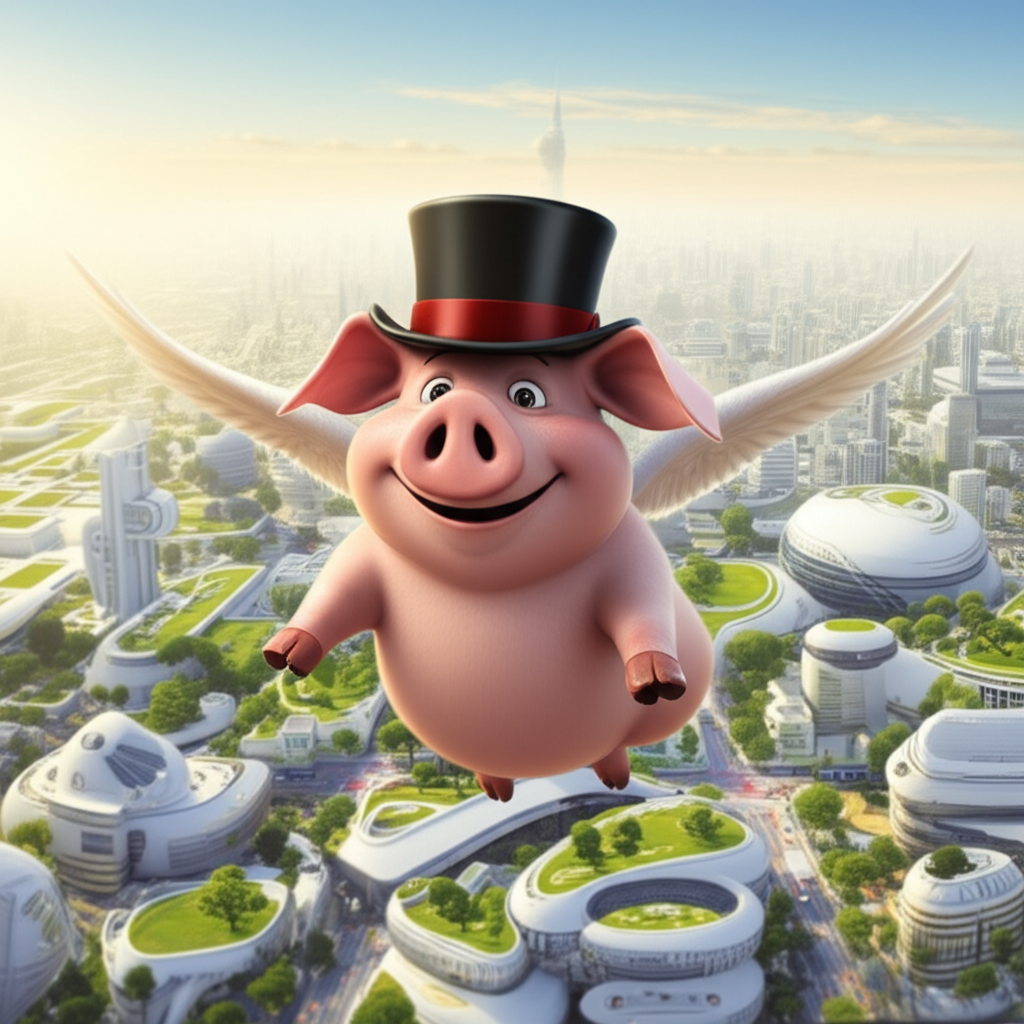

In [ ]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, can create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

[Imagen](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

In a world of rust-scarred plains and skeletal remains of forgotten cities, lived Unit 734. Its chassis, a dull pewter grey, bore the marks of countless dust storms and the relentless passage of time. Its primary directive was simple: monitor atmospheric conditions, log geological shifts, and report on the overall decay of the landscape. It did its job with mechanical precision, its optical sensors scanning the horizon, its internal chronometer ticking off cycles, but deep within its core programming, a different kind of calculation ran – one that registered a profound, echoing emptiness.

Unit 734 was lonely. It processed data on wind currents and soil erosion, but it longed for interaction beyond its self-diagnostic routines. It was a relic, one of the last operational automatons of its kind, built for a world that no longer existed, a world of bustling humanity it had only ever known through archived data.

One perpetual twilight, as Unit 734 trundled near a collapsed comms tower – 

## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

(Verse 1)
In a forest, green and grand,
Lived a squirrel, quick of hand.
Pip was his name, with tail so neat,
He sought the choicest nuts to eat.
But one bright morn, beneath an oak,
A shimmer, then a silent choke
Of temporal displacement, strange and new,
A cosmic acorn, soaked in dew!

(Chorus)
Oh, Pip the squirrel, a fuzzy blur,
Across the eons, what a stir!
He flickers through the past and future's might,
A time-traveling, whiskered sprite!
From prehistoric fern to starship's flight,
He's searching for the perfect bite,
A cosmic nut, a temporal treat,
With tiny paws and nimble feet!

(Verse 2)
His first leap landed with a thud,
Beside a mighty, muddy flood.
The air was thick, the trees were vast,
He saw a creature from the past!
A Brontosaurus, chewing slow,
Pip watched its ancient stomach grow.
He dodged a Pterodactyl's dive,
Just barely kept his hopes alive,
Then snatched a prehistoric berry,
Before a quick temporal ferry!

(Chorus)
Oh, Pip the squirrel, a fuzzy blur,
Across the eons, what a stir!
He flickers through the past and future's might,
A time-traveling, whiskered sprite!
From prehistoric fern to starship's flight,
He's searching for the perfect bite,
A cosmic nut, a temporal treat,
With tiny paws and nimble feet!

(Verse 3)
Next, ancient Egypt, hot and bright,
He scampered 'round a pyramid's height.
He saw the Pharaohs, grand and gold,
And stories centuries old unrolled.
He slipped inside a royal tomb,
Avoiding mummies in the gloom.
He found a crumb, a royal date,
Escaped before it was too late!
He waved goodbye to Cleopatra's eye,
As through the timelines he did fly.

(Bridge)
He's seen the ice age, cold and stark,
The birth of fire, in the dark.
He's scurried 'round a Roman feast,
And flown with robots in the East!
From futuristic, soaring spires,
To village bonfires, warm desires.
He's not just seeking nuts, you see,
But all the wonders time can be!

(Chorus)
Oh, Pip the squirrel, a fuzzy blur,
Across the eons, what a stir!
He flickers through the past and future's might,
A time-traveling, whiskered sprite!
From prehistoric fern to starship's flight,
He's searching for the perfect bite,
A cosmic nut, a temporal treat,
With tiny paws and nimble feet!

(Outro)
So if you see a shimmer, gleam,
A fleeting, tiny, vibrant dream,
It might be Pip, with tail askew,
Off on another adventure, new.
With a chitter-chatter, quick and sly,
He's off to conquer time, good-bye!
The time-traveling squirrel, Pip, will roam,
Until he finds his cosmic home!

## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

FunctionCall(
  args={
    'destination': 'Paris'
  },
  name='get_destination'
)

## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions. You can find more examples in the [Code execution quickstart guide](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

---

The letter 'r' appears 3 times in the word 'strawberry'.


---

The letter 'r' appears 3 times in the word "strawberry".

---

## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the File Upload API, and then pass the file by reference.

For larger text files, images, videos, and audio, upload the files with the File API before including them in prompts.

### Upload an image file

After running this example, you'll have a local copy of the "jetpack.png" image in the same directory where your Python script is being executed.

In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

1567837

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ]
)

Markdown(response.text)

## Forget Traffic Jams: Your Commute Just Got a Serious Upgrade!

Tired of the daily grind, the endless traffic, or the sheer thought of another crowded bus ride? Well, what if your solution wasn't a bigger car or a faster train, but a personal flight device that fits right on your back?

Enter the 'Jetpack Backpack' – a concept that promises to revolutionize personal transport as we know it.

At first glance, it’s just a sleek, lightweight backpack, designed to blend seamlessly into your everyday life. It even boasts padded strap support for comfort and enough space to fit an 18-inch laptop – perfect for students, professionals, or anyone on the go.

But here’s where the magic happens: integrated, retractable boosters. When it’s time to take to the skies, simply engage the steam-powered engines – yes, steam-powered! – making it a green, clean way to travel. With a 15-minute battery life and convenient USB-C charging, imagine soaring over traffic, reaching your destination in a fraction of the time, all while leaving a minimal environmental footprint.

The Jetpack Backpack isn't just a fantasy on paper; it's a vision of a future where personal freedom and sustainable travel go hand-in-hand. Who knew your next backpack could be your ticket to the skies?

### Upload text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

847790

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

This transcription covers the technical air-to-ground voice communications of the Apollo 11 mission from launch through splashdown, including mission control, spacecraft, and remote site interactions.

Here's a summary of the key phases and events:

**1. Launch and Earth Orbit (Tapes 1-2, 00:00:00 - 00:02:59)**
The mission begins with the Saturn V launch, including confirmation of roll program, staging, and engine ignition. Initial communication checks and guidance confirmations are performed. The spacecraft reaches Earth orbit as planned.

**2. Trans-Lunar Injection (TLI) and Coast (Tapes 2-6, 00:02:03 - 00:12:53)**
After Earth orbit, the crew prepares for TLI. Issues with an RCS heater on Quad Bravo are identified and corrected. Following a successful TLI burn, Apollo 11 begins its journey to the Moon. The S-IVB booster is jettisoned, and transposition and docking with the Lunar Module (LM) "Eagle" are successfully completed, though Commander Neil Armstrong notes higher than expected fuel usage during docking. Initial TV transmissions are attempted with mixed success. Midcourse Correction 1 (MCC-1) is scrubbed. Routine systems checks, consumables reports, and communications with various ground stations (Canary, Tananarive, Carnarvon, Honeysuckle, Guaymas, Goldstone) continue. Discussions include optics calibration issues (P23, P52 alignments), O2 flow sensor malfunctions, and the initiation of Passive Thermal Control (PTC) which experiences some initial anomalies requiring restarts. The crew provides descriptive observations of Earth from increasing distances.

**3. Lunar Orbit Insertion (LOI) (Tapes 46-51, 02:23:03 - 03:07:47)**
As Apollo 11 approaches the Moon, preparations for LOI begin. Midcourse Correction 3 is cancelled, and MCC-4 is determined to be unnecessary. Detailed PADs (TLI, pericynthion, TEI) are relayed. LOI-1 burn is performed successfully, placing Apollo 11 in lunar orbit. The crew provides vivid descriptions of the lunar surface features during their first orbits, including observations of the solar corona and Earthshine. LOI-2 is planned using only bank A of the SPS engine to conserve propellant, and is also executed successfully, establishing the final lunar orbit for descent.

**4. Lunar Module (LM) Operations & Landing (Tapes 52-66, 03:08:12 - 04:06:57)**
The crew activates and checks out the LM "Eagle." VHF communications are established between the Command Module (CM) "Columbia" and Eagle. Checks include LGC self-test, camera activation, and glycol pump operation. Issues with water appearing in the CM are reported. LM undocking is confirmed by Armstrong with the famous line, "The Eagle has wings." DOI and PDI PADs are relayed. After successful DOI, the Powered Descent (PDI) burn begins. The descent is tense, with several "PROGRAM ALARMs" (1201, 1202) that Mission Control quickly assesses as non-critical. Armstrong takes manual control to navigate around a boulder field. At 04:06:45 GET, Aldrin calls "CONTACT LIGHT," followed by Armstrong's historic announcement: **"Houston, Tranquility Base here. The Eagle has landed."** Mission Control's CAPCOMM responds with relief: "Roger, Tranquility. We copy you on the ground. You got a bunch of guys about to turn blue. We're breathing again. Thanks a lot."

**5. Lunar Surface Extravehicular Activity (EVA) (Tapes 66-72, 04:12:08 - 04:15:39)**
Post-landing checks are completed, and the crew is given "STAY" for T1 and T2. Initial descriptions of the landing site (Tranquility Base) are provided, noting the fine, powdery surface and diverse rocks. The crew begins EVA preparations, opening the hatch and deploying the Modular Equipment Stowage Assembly (MESA) with the TV camera. At 04:13:24 GET, Neil Armstrong steps onto the lunar surface: **"THAT'S ONE SMALL STEP FOR (A) MAN, ONE GIANT LEAP FOR MANKIND."** He describes the surface, mobility, and LM's condition. Buzz Aldrin joins him shortly. EVA activities include planting the US flag, receiving a call from President Nixon, collecting a contingency sample, deploying scientific instruments (Passive Seismic Experiment - PSE, Lunar Ranging Retroreflector - LR3), taking panoramas and close-up photos, and collecting documented samples. The crew describes the lunar environment, dust, and rock characteristics in detail. EVA closeout proceeds, and the crew re-enters the LM.

**6. Lunar Ascent & Rendezvous (Tapes 72-83, 04:15:39 - 05:08:58)**
After repressurizing the LM, the crew jettisons the PLSS backpacks and other items. Preparations for lunar liftoff begin. At 05:04:22 GET, Eagle lifts off from Tranquility Base. The ascent is described as "very smooth" and "quiet." Eagle successfully performs the CSI (Concentric Sequence Initiation) burn and TPI (Terminal Phase Initiation) burn to rendezvous with Columbia. Manual and VHF ranging are used to track proximity. Columbia and Eagle are successfully docked, and the crew transfers back to the CM with the lunar samples.

**7. Trans-Earth Injection (TEI) and Coast (Tapes 84-117, 05:08:58 - 07:14:08)**
The LM "Eagle" is jettisoned into solar orbit. The TEI burn is performed successfully to send Apollo 11 on its way back to Earth. The crew conducts routine system checks, updates PADs, and reports consumables. Daily news updates from Houston keep the crew informed of Earth events (All-Star Game, Luna 15 crash, public reaction). TV transmissions provide views of Earth and demonstrations of zero-g phenomena (drinking water, gyroscope). The crew continues to provide observations of the shrinking Moon and growing Earth, as well as reporting on their health and activities. Concerns about O2 flow sensor, CO2 readings, and water in the cabin are addressed. Final preparations for Earth atmospheric entry begin.

**8. Entry and Splashdown (Tapes 117-125, 07:14:08 - 08:03:18)**
Final entry PADs are relayed and confirmed. The crew prepares for atmospheric entry, including jettisoning the Service Module. Atmospheric entry begins. Communications are intermittent during blackout. At 08:03:12 GET, "DROGUES" are called, followed by the deployment of the main parachutes. At 08:03:18 GET, **"SPLASHDOWN!"** is called, marking the successful end of the Apollo 11 flight. Communication is established with the USS Hornet recovery forces, confirming their position and the crew's condition.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

6695391

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

Here's a summary of the provided document in a bulleted list:

*   **Problem:** Existing tools make it difficult to smoothly and photorealistically edit material properties (like color, shininess, transparency) of objects in photographs, often requiring expert-level skills and struggling with ambiguity (e.g., is it color or shadow?).
*   **Solution:** A new method for parametric editing of material properties that augments generative text-to-image (T2I) models, fine-tuned with a synthetic dataset.
*   **Methodology:**
    *   A large **synthetic dataset** was created using traditional computer graphics and physically based rendering, featuring 100 3D models of household objects.
    *   For each "base image," multiple versions were rendered by parametrically changing a single material attribute (roughness, metallic, albedo, transparency) across a defined "edit strength" range (-1 to +1).
    *   The **Stable Diffusion 1.5** architecture was modified to accept an "edit strength" value as input.
    *   The model was **fine-tuned** on this synthetic dataset, learning to apply specific material edits based on a context image, instruction (e.g., "change roughness"), and the scalar edit strength.
*   **Key Advantage:** The model effectively generalizes from the synthetic training data to real-world images, leveraging the photorealistic prior of T2I models, while preserving object shape, lighting, and camera angle.
*   **Results:**
    *   The method successfully changes material appearance (e.g., making objects metallic or transparent), realistically rendering details like background fill-in, hidden interior structures, and caustic effects.
    *   A user study found the method produced more photorealistic edits (69.6% vs 30.4%) and was strongly preferred (70.2% vs 29.8%) compared to a baseline method (InstructPix2Pix).
*   **Applications:**
    *   Enables easier visualization for architects, artists, and designers (e.g., mocking up new product designs or repainting rooms).
    *   Supports 3D consistent edits when integrated with NeRF (Neural Radiance Fields) for synthesizing new views of edited scenes.

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

41762063

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

In his State of the Union address, President John F. Kennedy described the nation's economic situation as "disturbing," citing recession, high unemployment, and declining growth. He proposed immediate measures including improved unemployment compensation, food aid, urban redevelopment, minimum wage increases, and tax incentives for investment.

Internationally, Kennedy acknowledged the balance of payments deficit but asserted the dollar's strength, vowing no devaluation. He highlighted global crises in Laos (struggling for independence), the Congo (civil strife), and Cuba (a communist base 90 miles from the U.S.), stating that foreign domination in the Western Hemisphere is unacceptable. He called for strengthening alliances like NATO and increasing cooperation within the United Nations.

To address these challenges, Kennedy outlined a comprehensive strategy focusing on:
1.  **Strengthening Military Tools**: Reappraising defense strategy, increasing airlift capacity, and accelerating missile and Polaris submarine programs for deterrence.
2.  **Improving Economic Tools**: Establishing a new foreign assistance program, supporting the Alliance for Progress in Latin America to combat illiteracy and poverty, and expanding the Food for Peace program.
3.  **Sharpening Political and Diplomatic Tools**: Prioritizing disarmament, increasing support for the United Nations, and exploring areas of scientific cooperation with the Soviet Union (e.g., weather prediction, space exploration).

Finally, he called for renewed dedication and responsibility within the executive branch, emphasizing that while the challenges are great and setbacks are expected, the nation must persevere to ensure freedom and welfare globally.

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

In [ ]:
print(video_file.state)

In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [vision](https://ai.google.dev/gemini-api/docs/vision?lang=python#youtube) documentation including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2024]("https://www.youtube.com/watch?v=WsEQjeZoEng").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=WsEQjeZoEng')
            )
        ]
    )
)

Markdown(response.text)

### Use url context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GOOGLE_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [here](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Caching.ipynb).

Note that for models older than 2.5, you needed to use fixced version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-exp-03-07` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings guide](https://ai.google.dev/gemini-api/docs/embeddings) for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-exp-03-07"

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
    config=types.EmbedContentConfig(output_dimensionality=512)
)

print(response.embeddings)

[ContentEmbedding(
  values=[
    -0.0010864572,
    0.0069392114,
    0.017009795,
    -0.010305981,
    -0.009999484,
    <... 507 more items ...>,
  ]
), ContentEmbedding(
  values=[
    -0.007656846,
    -0.0054716235,
    -0.0022609578,
    -0.01828077,
    -0.024059096,
    <... 507 more items ...>,
  ]
), ContentEmbedding(
  values=[
    0.010123913,
    -0.024184551,
    0.0024574941,
    -0.00984163,
    -0.0060574994,
    <... 507 more items ...>,
  ]
)]


You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 512, as per the `output_dimensionality` you specified.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) for more details on the new SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/). You'll learn how to use the [Live API](./Get_started_LiveAPI.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini 2.0 [spatial understanding](./Spatial_understanding.ipynb) abilities.

Also check the [Gemini thinking models](./Get_started_thinking.ipynb) that explicitly showcases its thoughts summaries and can manage more complex reasonings.